In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/911.csv')

In [3]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.shape

(4212, 9)

In [6]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [7]:
df.describe( )

,lat,lng,zip,e
count,4212.000000,4212.000000,3691.000000,4212.0
mean,40.159896,-75.315175,19237.516933,1.0
std,0.083632,0.149442,276.090054,0.0
min,39.980172,-75.710780,18041.000000,1.0
25%,40.102691,-75.389509,19038.000000,1.0
50%,40.143183,-75.303544,19401.000000,1.0
75%,40.229008,-75.213795,19446.000000,1.0
max,40.433931,-75.000755,19525.000000,1.0


In [9]:
 df['zip'].value_counts().head(5)

19401.0    307
19464.0    266
19403.0    241
19446.0    188
19406.0    153
Name: zip, dtype: int64

In [10]:
df['zip'].nunique()

75

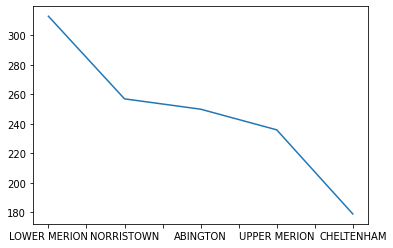

In [12]:
df['twp'].value_counts().head(5).plot()

In [13]:
df['title'].nunique()

77

In [15]:
df['title'].value_counts().head(5)

Traffic: VEHICLE ACCIDENT -    1129
Traffic: DISABLED VEHICLE -     267
Fire: FIRE ALARM                230
EMS: CARDIAC EMERGENCY          228
EMS: RESPIRATORY EMERGENCY      218
Name: title, dtype: int64

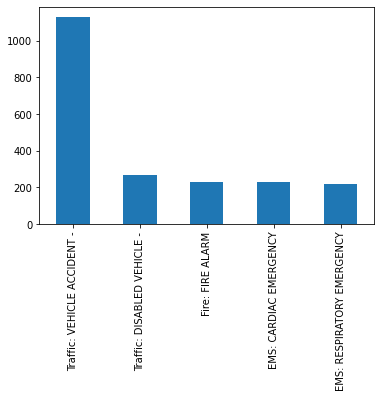

In [17]:
 df['title'].value_counts().head(5).plot.bar()

In [18]:
# Most common Reasons that call emergency
df['Reasons'] = df['title'].apply(lambda title: title.split()[0])
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS:
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS:


In [19]:
df['Reasons'].unique()

array(['EMS:', 'Fire:', 'Traffic:'], dtype=object)

In [20]:
df['Reasons'].value_counts()

EMS:        2088
Traffic:    1545
Fire:        579
Name: Reasons, dtype: int64

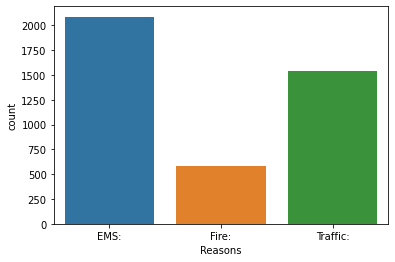

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['Reasons'],data=df)

##**Processing** **data** **time**

In [30]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['Year'] = pd.DatetimeIndex(df['timeStamp']).year
df['Month'] = pd.DatetimeIndex(df['timeStamp']).month
df['Time'] = pd.DatetimeIndex(df['timeStamp']).time
df['DaysOfWeek'] = pd.DatetimeIndex(df['timeStamp']).dayofweek
df['Date'] = pd.DatetimeIndex(df['timeStamp']).date
df['DayOfWeek'] = df['DaysOfWeek'].map({
    0:'Mon',
    1:'Tue',
    2:'Wed',
    3:'Thru',
    4:'Fri',
    5:'sat',
    6:'sun'
})

df.tail(8)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Year,Month,Time,Date,DaysOfWeek,DayOfWeek
4204,40.202058,-75.255480,DEKALB PIKE & SUMNEYTOWN PIKE; LOWER GWYNEDD; ...,19002.0,Traffic: VEHICLE ACCIDENT -,2015-12-22 06:24:40,LOWER GWYNEDD,DEKALB PIKE & SUMNEYTOWN PIKE,1,Traffic:,2015,12,06:24:40,2015-12-22,1,Tue
4205,40.008346,-75.293881,ARDMORE AVE & W ATHENS AVE; LOWER MERION; 2015...,19003.0,Traffic: ROAD OBSTRUCTION -,2015-12-22 06:23:35,LOWER MERION,ARDMORE AVE & W ATHENS AVE,1,Traffic:,2015,12,06:23:35,2015-12-22,1,Tue
4206,40.081373,-75.266494,SCARLET OAK DR & ELDER LN; WHITEMARSH; Statio...,19444.0,EMS: GENERAL WEAKNESS,2015-12-22 06:27:24,WHITEMARSH,SCARLET OAK DR & ELDER LN,1,EMS:,2015,12,06:27:24,2015-12-22,1,Tue
4207,40.310697,-75.539045,BIG RD & HOFFMANSVILLE RD; NEW HANOVER; 2015-1...,19525.0,Traffic: VEHICLE ACCIDENT -,2015-12-22 06:47:02,NEW HANOVER,BIG RD & HOFFMANSVILLE RD,1,Traffic:,2015,12,06:47:02,2015-12-22,1,Tue
4208,40.105304,-75.144024,WHARTON RD & PARKDALE AVE; ABINGTON; Station ...,19038.0,EMS: NAUSEA/VOMITING,2015-12-22 06:48:47,ABINGTON,WHARTON RD & PARKDALE AVE,1,EMS:,2015,12,06:48:47,2015-12-22,1,Tue
4209,40.089604,-75.148337,GREENWOOD AVE & BARKER RD; CHELTENHAM; Statio...,19095.0,EMS: CARDIAC EMERGENCY,2015-12-22 06:54:18,CHELTENHAM,GREENWOOD AVE & BARKER RD,1,EMS:,2015,12,06:54:18,2015-12-22,1,Tue
4210,40.168717,-75.144461,WALNUT GROVE DR & DRESHER RD; HORSHAM; Statio...,19044.0,EMS: VEHICLE ACCIDENT,2015-12-22 06:55:05,HORSHAM,WALNUT GROVE DR & DRESHER RD,1,EMS:,2015,12,06:55:05,2015-12-22,1,Tue
4211,40.168717,-75.144461,WALNUT GROVE DR & DRESHER RD; HORSHAM; 2015-12...,19044.0,Traffic: VEHICLE ACCIDENT -,2015-12-22 06:54:44,HORSHAM,WALNUT GROVE DR & DRESHER RD,1,Traffic:,2015,12,06:54:44,2015-12-22,1,Tue


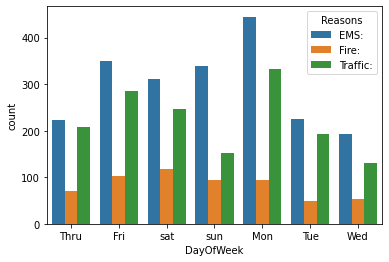

In [33]:
# Which week
sns.countplot(x='DayOfWeek',
              data=df,
              hue="Reasons")

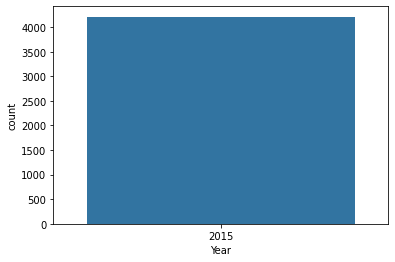

In [34]:
# Maximun in which year
sns.countplot(x='Year',
              data=df)